In [38]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv("./breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
data.shape

(569, 32)

In [41]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [42]:
data.drop('id', axis=1, inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [44]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [45]:
# Replace the target M and B with 1 and 0
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_2660\2730562983.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})


In [46]:
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [47]:
# Split into X (feature) and y(target)
X = data.drop('diagnosis', axis=1).to_numpy()
Y = data['diagnosis'].values

In [48]:
X.shape

(569, 30)

In [49]:
Y.shape


(569,)

In [96]:
# Make d first column of X be 1. this handles bias in the vectoriztion(anything multiplied by 1 is dat thing.)
X = np.c_[np.ones(len(X)), X]

In [97]:
X.shape

(31, 570)

In [98]:
X = X.T

In [99]:
X.shape


(570, 31)

## Compute Hypothesis

In [100]:
def compute_hypothesis(params, X):
    # The bias term is added as the first 
    z = np.matmul(params.T, X)
    prediction = 1/(1+np.exp(-z))
    return prediction

## Compute Cost 

In [101]:
def compute_cost(predictions, actual):
    m = len(actual)
    log_of_predictions = np.log(predictions)
    log_of_oneMinusPredictions = np.log(1-predictions)
    cost = -(1/m)*np.sum(((actual*log_of_predictions) + ((1-actual)*(log_of_oneMinusPredictions))))
    return cost

## Predict Classes
probabilty based on 0.5

In [102]:
def predict_classes(predictions):
    # All predictions is set initially to zero
    predicted_classes = np.zeros(len(predictions))
    
    #Change to 1 if probability > 0.5
    predicted_classes[np.where(predictions>=0.5)] = 1
    return predicted_classes

## Calculate accuracy

In [103]:
def calculate_accuracy(class_predictions, actual):
    accuracy = (sum(class_predictions==actual)/len(actual))*100
    return accuracy

## Gradient Descent implementation


In [93]:
def gradient_descent(X, Y, learning_rate, iterations):
    actual = Y
    costs = []
    accuracies = []
    params = np.zeros(X.shape[0])
    m = len(actual)

    for i in range(iterations):
        predictions = compute_hypothesis(params, X)
        #The probabilty is now converted to 0 or 1 using 0.5 benchmark
        class_predictions = predict_classes(predictions)
        accuracies.append(calculate_accuracy(class_predictions, actual))
        costs.append(compute_cost(predictions, actual))
        errors = predictions - actual
        #Use Vectorization
        gradients = (1/m)*np.matmul(X,errors)
        params = params - (learning_rate*gradients)
    
    return params, costs, accuracies


In [94]:
learning_rate = 0.000001
iterations = 1000
params, costs, accuracies = gradient_descent(X, Y, learning_rate, iterations)

params: (31,)
X: (31, 569)


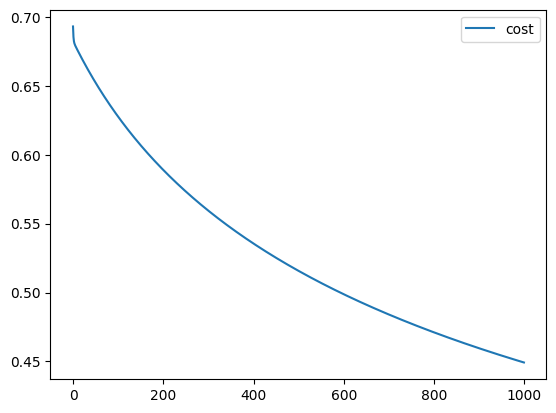

In [104]:
plt.plot(np.arange(1000), costs, label='cost' )
plt.legend(loc='upper right')

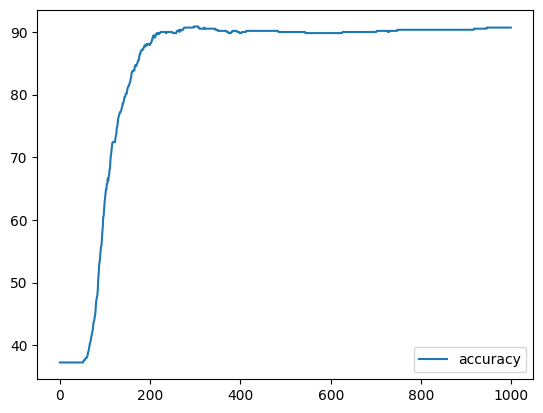

In [105]:
plt.plot(np.arange(1000), accuracies, label='accuracy' )
plt.legend(loc='lower right')